
<img src="imgs/chi2019_logo_final.png">

# Bayesian Methods in HCI


$$\newcommand{\vec}[1]{{\bf #1} } 
\newcommand{\real}{\mathbb{R} }
\newcommand{\expect}[1]{\mathbb{E}[#1] }
\DeclareMathOperator*{\argmin}{arg\,min}
$$

----

## John H. Williamson 

* **University of Glasgow**
* JohnH.Williamson@glasgow.ac.uk / [johnhw.com](johnhw.com)
* @jhnhw  
* [github.com/johnhw](https://github.com/johnhw)



# What is Computational Interaction?
**Computational interaction** applies computational thinking (abstraction, automation, analysis) to explain and enhance interaction between a user and a system. It is underpinned by modelling which admits formal reasoning, and which is amenable to computational approaches.

There's even a book:

<img src="imgs/comp_interaction_book.jpg">

*[Edited by Antti Oulasvirta, Per Ola Kristensson, Xiaojun Bi, and Andrew Howes]*

---


Computational interaction draws on insight from:
* machine learning;
* signal processing;
* information theory;
* optimisation;
* Bayesian inference;
* control theory;
* and formal modelling.

It emphasises generating motor themes in HCI, and robust, replicable and durable approaches which go beyond point sampling of the interaction space.

### Computational interaction would typically involve at least one of:
* I. an explicit **mathematical model** of user-system behaviour;
* II. a way of **updating** that model with observed data from users;
* III. an algorithmic element that, using this model, can **directly synthesise or adapt** the
design;
* IV. a way of **automating and instrumenting** the modelling and design process;
* V. the ability to **simulate or synthesise** elements of the expected user-system behaviour.

Computational interaction often involves elements from machine learning, signal processing, information theory,
optimisation, inference, control theory and formal modelling.



## Bayesian methods in HCI


A **Bayesian**:

* Represents belief over possibilities using probability distributions.
* Updates belief using Bayes' Rule, combining a prior belief with observed evidence.
* Infers conditional distributions over unseen parameters.

Given a parameterised simulator that approximates the problem we are interested in, and some idea about what values these parameters could take on (expressed as a prior probability distribution) we can then use evidence to concentrate belief on more likely parameter configurations.

---

## The mysterious entity cartoon

<img src="imgs/entity.png">

We observe data from a mysterious entity, like a user seen through the lens of a sensor. 

We have a "tame" mysterious entity governed by knobs (parameters) we can adjust; an approximation to a user and their local environment, perhaps. 

This has an input: the likelihood of observations under current parameter settings, and an output: the ability to sample new synthetic observations under the current parameters. We have a belief distribution over knob settings, and can update this based upon observations.

---

Bayesian methods have application throughout virtually of all of HCI, but are often only encountered in a few specialised niches; for example in speech recognition. There are a wide variety of areas where Bayesian methods can be directly *used* in HCI, three of the most well-explored being:

* **Bayesian methods in empirical analysis** (i.e. Bayesian statistics for analysing experimental work): Bayesian analysis offers a potentially superior way of analysing some kinds of quantitative experimental work that arise in HCI. It can directly answer questions of interest and can incorporate first-principles models from domain experts. There are opportunities for novel experimental designs (e.g. online Bayesian experimental design) and meta-analyses. The advance of easy-to-use packages for Bayesian inference (e.g. Stan, brms) makes relatively sophisticated inference models practical for researchers. (**"Statistical Rethinking" by Richard McElreath** is recommended reading as a non-HCI specific elementary introduction to Bayesian data analysis)

<img src="imgs/ymxc_stochastic.png" width="60%">
<img src="imgs/sampled_posterior_predictive.png">

* **Bayesian methods in optimisation**: Bayesian optimisation can be used to optimise functions which are not easy to evaluate, or are noisy to evaluate. This is typically the case in optimisation with observations from users, who are expensive to measure, noisy and not governed by simple mathematical formulae. This can range from simple Bayesian A/B testing to sophisticated modelling of user behaviour at a fine level of granularity. Bayesian optimisation can be applied to a huge range of problems with expensive or noisy functions, from inferring subjective preferences to optimising touch sensor configurations. Proxy models like Gaussian Processes are well-supported by software tools.

<img src="imgs/bayesian_optimization.jpeg"> 

*[From the emukit documentation: https://amzn.github.io/emukit/bayesian-optimization/]*

* **Bayesian methods in input decoding**: Bayesian methods can be used to represent the problem of the interface itself -- how does information flow from human to computer? This can be used to derive robust models based around inference of intention. Strong prior models of what we expect users to do allow us to extract maximum value from user actions and preserve and use uncertainty about user intent. This is a philosophy of interaction founded in the idea of the interface as a concentrator of belief, whose mechanics are driven by the logic of probability.

<img src="imgs/capture.png" width="50%">

*[Bayesian inference of gesture recognition]*

* **Bayesian models of user population behaviour** Probabilistic predictive models can be used to capture how populations of users behave, and reason about likely future behaviours. Generative models of behaviour can be conditioned on observations, and even relatively small amounts of real-world data can be used to get powerful insights when strong first-principles models are brought to bear.


There are other topics where Bayesian ideas have bearing on problems in interaction design, including:
* **Interaction with Bayesian models**, that is how to explain, explore, understand and make help users make decisions with probabilistic models (see e.g. [Explorable Multiverse Analyses](https://explorablemultiverse.github.io/)). This is a problem of communicating distributions and computations upon them.

* **Bayesian models of human cognition and activity** which seek to explain human (user) behaviour, from low-level motor actions and perceptual functions through to decision making, as approximate Bayesian inference. 

# Bayesian filtering for intention inference

#### Inferring user intention in a noisy world
----

    All theorems are true. 
    All models are wrong. 
    And all data are inaccurate. 

    What are we to do? 
    We must be sure to remain uncertain.

-- *[Leonard A. Smith, Proc. International School of Physics ``Enrico Fermi", (1997)](http://www2.maths.ox.ac.uk/~lenny/fermi96_main_abs.html)* 


This section will cover probabilistic **inference**. Rather than learning a single set of parameters by optimisation, we can infer probability distributions over possible configurations of models that might be compatible with our data. Our "models" will be representations of user intentions and parameters of the processes that transduce intention into sensor measurement.

We will develop the idea of **probabilistic filtering** to rigorously define the interaction problem as online probabilistic inference over time, and derive practical algorithms that can be fuse together input device signals across time and across sensors channels. This will give us a robust, theoretically underpinned way of combining together sensing into estimates of intention.

### Why is this relevant for computational HCI?
* We will build **statistical models** of user behaviour, and estimate parameters of that model from quantitative observations of data. 
* This is a **model-led approach** which has a strong mathematical underpinning and many powerful algorithmic tools which can be brought to bear.
* This is **robust** (it appropriately represents uncertainty) and **generative** (it can simulate behaviour compatible with observations).  


------

# Principles 
-------




> Interaction is the process of driving a system into a state compatible with user intentions.

<img src="imgs/brainspace.png" width="100%">

Note that we focus here on the problem of **input**; getting a computer to do what we want. We will touch on the problem of **feedback** where we aligning users with the processes mediating this input using some form of display. However, we will not consider the **display** problem, where we try to efficiently inject information from a computer into a user's mind.

## Perspectives
There are many perspectives on interaction that arise from this stance, including:

| Perspective   | Burden | Characteristic                         |
|---------------|--------|----------------------------------------|
| Communication | User   | User gets information into the system, by encoding intentions. |
| Control       | Split  | User drives state towards intention via feedback control.   |
| Inference     | System | System infers what user intention is from sensed user actions. |

## Interaction as inference
If we view interaction as inference of intention, there are three elements:
* **Interaction is inference**; it is the process of inferring a distribution over a hidden variable: what the user wants a system to do. 
* **Observations are indirect, noisy and incomplete** What a system sees is a distorted and incomplete representation of user actions in the world, which are in turn a noisy representation of internal intentions (your hand does not always go where you want it...)
* **Interaction occurs over time** Interaction is a *process* that evolves over time. Information flow is not instantaneous. Observations must be fused together to update a beliefs.

### Optimal mindreading
We'll look at a **Bayesian** approach to modelling human computer interaction, where we explicitly model what might be going on inside a user's mind and use Bayesian methods to try and perform "optimal mindreading". 

<img src="imgs/brain_inference.png" width="70%">

#### Concentrating belief
This view on interaction sees user intentions as **unknown values** which are partially observed through inputs. The time series of inputs from the user give a partial, noisy, incomplete view of intention inside the user's head, along with a great deal of superfluous information. 

We try and infer intention *generative model* which is a simplified representation of intention and how it is mediated and transformed by the world. The stronger model we have available, the more effectively we can infer intention.

> In this view, improving interaction (or at least *input*) comes down to more efficiently concentrating probability density where a user wants it. A better pointing device reduces uncertainty faster; a better display helps a user understand how best to target future actions to concentrate belief as desired; a better model of the user intentions concentrates belief with less explicit effort on the part of a user.

<img src="imgs/contraction_probability.png" width="70%">

## Partitioning the inferred variables

We can further partition the problem. The causes of observed evidence can be factored, for example, into:

* **Mind state** The parameters of the intentions that generate the behaviour: what menu option does the user want?
* **World state** The parameters of the motor system that generate movement: where is the user's hand?
* **Sensor state** The parameters of the sensing system that generates signals: what is the camera matrix?

$$P(X_{\text{intention}}, X_{\text{motor}}, X_{\text{sensing}}|Y)$$

[Betancourt's article on probabilistic modeling](https://betanalpha.github.io/assets/case_studies/modeling_and_inference.html) expresses these ideas in terms of the "phenomenon" (intention), "environment" (motor/world system) and "probe" (sensing/interface context).

----


# Probability refresher

## Random variables and distributions
A **random variable** $X$ is a variable that can take on different values, but we do not know what value it has; i.e. one that is "unassigned". However, we have knowledge which captures the possible states the variable could take on, and their corresponding probabilities, which is encoded in the **distribution** of that variable. Probability theory allows us to manipulate random variables without having to assign them a specific value.

A random variable might represent:

* the outcome of dice throw (discrete), i.e. over the set of outcomes $\{1,2,3,4,5,6\}$; 
* whether or not it is raining outside (discrete: binary), over the set of outcomes $\{\text{heads}, \text{tails}\}$; 
* the height of person we haven't met yet (continuous), over the set of outcomes $\real$; 
* the position of a user's hand (continuous, multi-dimensional), over the set of outcomes $\real^3$. 

## Distributions
A **probability distribution** defines how likely different states of a random variable are. 

We can see $X$ as the the *experiment* and $x$ as the *outcome*, with a function mapping every possible outcome to a probability. 

$$P(X=x),\  \text{the probability of random variable X taking on value x}\\
P(X),\  \text{shorthand for probability of X=x }\\
$$

### Discrete and continuous

The function defining the distribution maps the outcomes of a random variables to real numbers (probabilities) in the range $[0,1]$, subject to the constraint that the sum of all probabilities across all outcomes. These probabilities, in a Bayesian world view, represent belief about how likely different outcomes are. Distributions are defined by functions $f_X(x)$, which give the probability of an outcome $x$ (imagine a dictionary mapping outcomes to probabilities). For technical reasons, these are distinghuised as **probability mass function** (PMF),  for discrete variables and  **probability density functions** (PDF), for continuous variables.

### Likelihood and probability
* We talk about the **probability** of outcomes we have not yet observed: how relatively likely are future possible states?
* We talk about the **likelihood** of outcomes we have observed: how likely is the data we have observed to have been generated by the distribution we have? We sometimes write the likelihood of an observation $x$ as $\mathcal{L}(x) = f_X(x)$ and is just evaluated by evaluating the mass/density function at $x$.

## Samples, outcomes and sampling
**Samples** are observed outcomes of an experiment; we will use the term **observations** to refer to the same thing when samples come from measurements, rather than being simulated. We can **sample** from a distribution; this means simulating outcomes according to the probability distribution of those variables. We can talk about the probability of generating a specific sample; and the likelihood of a given observation having being generated.

For discrete random variables, this is easy: we simply produce samples by drawing each outcome according to its probability. (For continuous variables, we need to use specific algorithms to draw samples according to a distribution.)

---

## Random variables

* Defined over a set of outcomes (e.g. `{heads, tails}` or the real numbers, or the set of `[longitude, latitude, altitude]` tuples, etc.)
* Defined by a function: probability mass/density function, which maps each outcome to a "belief weight" (probability) such that the integral/sum of all weights is 1.0
* Key operations:
    * **Likelihood**, which just evaluates the density/mass function at some value, i.e. evaluating $f_X(x)$ or $P(X=x)$ at some known $x$. We typically want to be able to compute the *log-likelihood*, as a more computationally useful form.    
    * **Sample**, simulating an example from a random variable, i.e. drawing a new random $x$ such that the long-term distribution of many such samples follows the distribution that defines the random variable.

---


In [180]:
## Standard imports
# numpy, scipy
import numpy as np
import scipy.stats
from scipy.stats import norm

import time
import IPython

# add our custom scripts
import sys
sys.path.append("src")

# custom packages from src/
import pfilter, gestures

# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8.0, 4.0), dpi=80)
plt.style.use("ggplot")

In [186]:
# A definition of a probabilty distribution in Python
# This is all we really need for *any* inference (though many convenience methods
# typically also defined)

class DiscreteRandomVariable:
    def __init__(self, pmf):
        self.pmf = pmf

    def lik(self, outcome):
        """Return the likelihood of some outcome"""
        return self.pmf[outcome]

    def sample(self, n):
        """Draw a random sample from this random variable"""
        return np.random.choice(list(self.pmf.keys()),
                                n,
                                p=list(self.pmf.values()))

In [187]:
coin = DiscreteRandomVariable({"heads":0.5, "tails":0.5})

In [188]:
print("Likelihood of observing heads", coin.lik("heads"))

Likelihood of observing heads 0.5


In [189]:
print("10 random draws from an unbiased coin:\n" + "\n".join(coin.sample(10)))

10 random draws from an unbiased coin:
heads
heads
tails
heads
tails
heads
heads
tails
tails
heads


In [190]:
dice = DiscreteRandomVariable({
    1: 1 / 24,
    2: 4 / 24,
    3: 10 / 24,
    4: 4 / 24,
    5: 4 / 24,
    6: 1 / 24
})

print("10 random draws from an biased die:\n", dice.sample(10))

10 random draws from an biased die:
 [5 5 3 5 3 2 3 2 3 3]


## What we can we do with this?

* We can **simulate** by *sampling* from a distribution.
* We can **evaluate** by computing *likelihoods* of observations.


<a id="bayesian"> </a>
## Probability theory and Bayesian inference

#### Probability as a calculus of belief
*Bayesians* treat probability as a **calculus of belief**; in this model of thought, probabilities are measures of degrees of belief. $P(X=x)=0$ means a belief that outcome $x$ can never occur and $P(X=x)=1$ is a belief that outcome $x$ is absolutely certain.belief in its viability.


The key process in Bayesian logic is *updating of beliefs*. 

* Given some **prior** belief (it's Glasgow, it's not likely to be sunny) 
* and some new **observations** for which we have a likelihood (there seems to be a bright reflection inside, and it is likely to be bright inside if it is sunny)
* we can update our belief to calculate the **posterior** -- our new probability that it is sunny outside. Bayesian inference requires that we accept priors over events. 

This implies we must explicitly quantify our assumptions with probability distributions. 

#### Prior, likelihood, posterior, evidence


We often have some **hypothesis** $H$ we want to know, given some **data** $D$ we observe, and we can write Bayes' Rule as:
$$ \begin{equation}P(H|D) = \frac{P(D|H) P(H)}{P(D)} \end{equation}$$

(the probability of the hypothesis given the data) is equal to (the probability of the data given the hypothesis) times (the probability of the hypothesis) divided by (the probability of the data).


In general $P(H|D) \neq P(D|H);$

* $P(H|D)$ is called the **posterior**
* $P(D|H)$ is called the **likelihood**
* $P(H)$ is the **prior**  
* $P(D)$ is the **marginal likelihood** 

---

## Bayesian interaction for inference of intention

If we look at the problem of **inferring intent**, then:

* We have **evidence** from input devices (e.g. a sequence of mouse movements)
* We have **prior distribution** over a space of intentions (e.g. how likely is it the user wants to select this item?)
* We want to infer the **posterior** distribution over intentions, conditioned on the observed evidence.

We can factor the posterior:

* **intention** The "simple" explanation that exists in the user's head
* **motor system** The expression of an intention through the motor system, influenced by the cognitive and physiological properties of the user
* **sensing system** The way the expression of intention is mapped onto sensor states which capture the variations in the world.

All of these components can have random parameters associated with them, and we can write down generative models that express these ideas in terms of these stages.

## Bayes' rule for combining evidence

One particularly powerful part of this that in a sequential process, the posterior at one step becomes the prior at the next; we can accumulate evidence over time. **It makes no difference whether we accumulate all the evidence at once, or do so step by step; the resulting distribution will be identical.**


<img src="imgs/recursive.png" width="50%">

<a id="combining"> </a>

Bayes' rule is the (only) correct way to combine prior belief and observation to update beliefs. This can be used to "learn", where "learning" means updating a probability distribution based on observations. It has enormous applications anywhere uncertain information must be fused together, whether from multiple sources (e.g. sensor fusion) or over time (e.g. probabilistic filtering). 

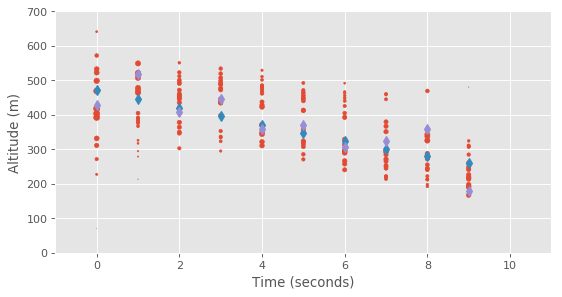

In [365]:
def estimate_landing(iters=100, noise=0.1, k=5):
    n_samples = 20
    alt_guess = np.random.normal(500, 300, n_samples)
    vsi_guess = np.random.normal(-20, 10, n_samples)
    
    
    alt_true = 500
    vsi_true = -27.5
    
    # set up a figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-0.5, 700)
    ax.set_ylabel("Altitude (m)")
    ax.set_xlabel("Time (seconds)")
    ax.set_xlim(-1, iters+1)
    
    for ix in range(iters):
        
                
        # update our position estimate
        alt_guess += vsi_guess
        
        # make a noisy observation
        alt_obs = alt_true + np.random.normal(0, noise)
        
        # update our simulated model
        alt_true += vsi_true
        vsi_true *= 0.97
        
        # compute a weighting function
        weights = np.exp(-(alt_guess - alt_obs)**2 * k)
        
        weights = weights / np.sum(weights) # normalise
        
        ax.plot(ix, alt_true, 'C1d')
        ax.plot(ix, alt_obs, 'C2d')
        ax.scatter(x=np.tile(ix, (len(alt_guess))), y=alt_guess, s=(weights)*250, color='C0')
        
        # copy the particles, favouring heavily weighted ones
        copies = pfilter.resample(weights)
        
        #for i in range(len(alt_guess)):
        #    ax.plot([ix, ix+1], [alt_guess[i], alt_guess[copies[i]]], 'C0-', alpha=0.2)
        
        alt_guess = alt_guess[copies]
        vsi_guess = vsi_guess[copies]
                                
        # add a little noise
        alt_guess += np.random.normal(0, 10, alt_guess.shape)
        vsi_guess += np.random.normal(0, 0.5, vsi_guess.shape)
                
        
estimate_landing(noise=50, k=5e-5, iters=10)      

(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)
(50, 20)


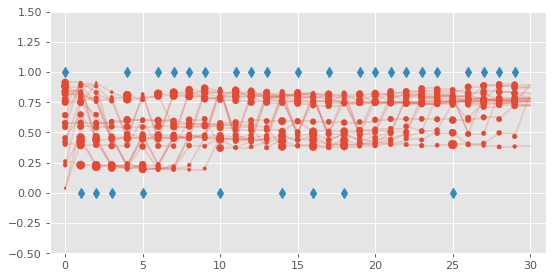

In [281]:

def estimate_coin(observations):
    n_samples = 20
    bias_samples = np.random.uniform(0, 1, n_samples)
    k = 5
    
    # set up a figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-1, len(observations)+1)
    
    for ix, observed in enumerate(observations):        
        ax.plot(ix, observed, 'C1d')
        
        
        # guess what we *would* observe
        guessed_observations = np.random.binomial(n=1, p=np.tile(bias_samples, (50, 1)))
        print(guessed_observations.shape)
        
        # compute a weighting function
        weights = np.sum(np.exp(-(observed - guessed_observations)**2 * k), axis=0)
        weights = weights / np.sum(weights) # normalise
        
        ax.scatter(x=np.tile(ix, (len(bias_samples))), y=bias_samples, s=weights*500, color='C0')
        # copy the particles, favouring heavily weighted ones
        copies = pfilter.resample(weights)
        
        for i in range(len(bias_samples)):
            ax.plot([ix, ix+1], [bias_samples[i], bias_samples[copies[i]]], 'C0-', alpha=0.2)
        
        bias_samples = bias_samples[copies]
                        
        
        # add a little noise
        bias_samples = np.clip(bias_samples + np.random.normal(0,0.01,n_samples), 0, 1.0)
                
        
estimate_coin(np.random.binomial(n=1, p=0.75, size=30))        
    

#### Example of Bayesian updating

We can show a simple example. Imagine trying to estimate the altitude of a plane attempting to land near an airstrip. We receive radar altitude measurements; these are inaccurate and occasionally. We have a rough idea of how high the plane might be (it's not likely to be trying to land from 10 km up), and very rough idea of how fast it is descending.

If we can define ways of sampling from these distributions, we can then update our beliefs. We will do this by "copying" samples which correspond to more likely states. This turns out to be a well-founded algorithm for Bayesian estimation.

In [ ]:
def simulate_plane(init_alt, init_vsi):
    # what is really happening
    true_altitude = init_alt
    true_vsi = init_vsi
        
    # generate a simple landing process
    observations = []
    for i in range(iters):
        true_altitude = np.clamp(true_altitude + true_vsi, 0, np.inf)
        true_vsi *= 0.95 # simulate slowdown on approach
        observations.append(true_altitude, true_vsi)
    return np.array(observations)

In [ ]:
        
    


def plane_landing_demo():
    
    n = 100 # we maintain 100 random samples
    iters = 50
    
    altitude = np.random.normal(1000, 200, n)
    vsi = np.random.normal(-50, 10, n)
    
    # our initial guess
    samples = np.stack([altitude, vsi]).T
    
    # what is really happening
    true_altitude = 700
    true_vsi = -75
        
        
    fig = plt.figure()
    ax = fig.add_subplot()
    for i in range(iters):
        true_altitude = np.clamp(true_altitude + true_vsi, 0, np.inf)
        
    

In [22]:
from bayes_demo import prior_posterior

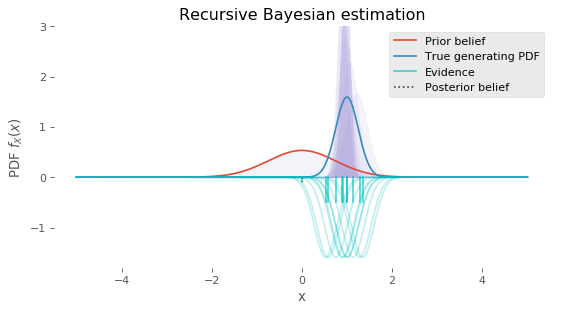

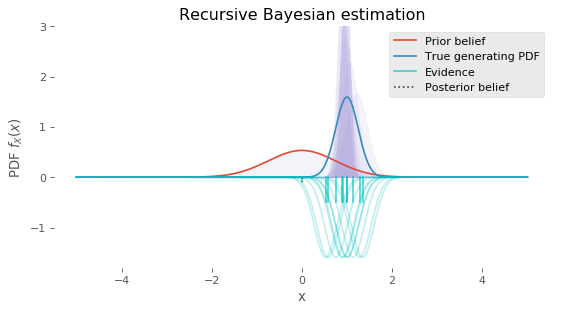

In [25]:
# fast convergence, strong belief in observed evidence, and informative prior
prior_posterior(prior_mean=0, prior_std=0.75, ev_std=0.25, anim=True)

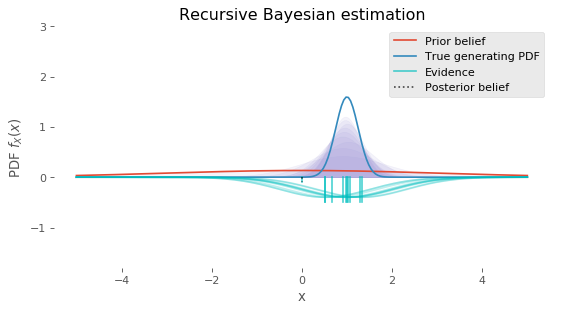

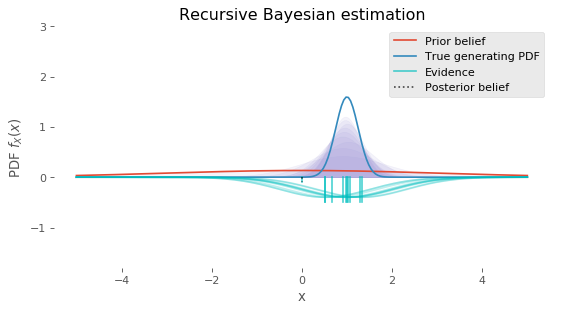

In [26]:
# weaker prior and less belief in evidence; slower convergence (but still works)
prior_posterior(prior_mean=0, prior_std=3, ev_std=1.0, anim=True)

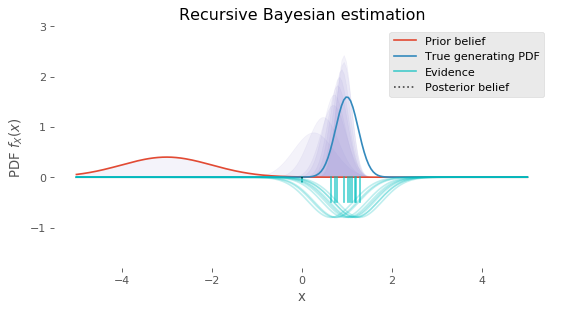

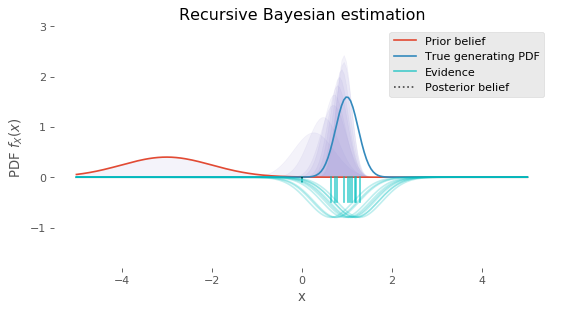

In [29]:
# really bad prior, but this will eventually be forgotten   
prior_posterior(prior_mean=-3, prior_std=1.0, ev_std=0.5, anim=True)

---



# Probabilistic filtering
We'll specifically look at probabilistic filtering, which is just Bayesian updating over time. There are a collection of algorithms for doing so efficiently.  Probabilistic filtering **(PF)** tracks the evolution of some unknown variables *[user intentions]* given observed evidence *[user input]*, in a way that is **robust**. Probabilistic filters infer a **distribution** over possible hidden (unobserved) variables, updating them over time. These filters are:
* inherently **uncertain**, as they represent degrees of belief as probability distributions over states
* and **dynamic**, as they explicitly model changing state over time.



### Properties
Probabilistic filtering is:

| Property | Why  |
|----------|------|
|**Bayesian**  |  Represents degrees of belief using probability distributions.    |
|**predictive**  |  Works by comparing predictions with reality.   |
|**generative** |  Involves generating (i.e. simulating) behaviour.   |

-----
Probabilistic filtering is an **inverse probability** approach, and it requires that we think of interaction from an unique perspective. We have to explicitly be able to write down:

* what we want to know (i.e. the **state space of intentions and world states**), which describes hidden states that might give rise to observed behaviour;
* how that will change over time (i.e. the **dynamics** of our model);
*  a model that *if we knew what the user intention was, what the expected behaviour would be* (i.e. a **generative function mapping intention -> expected observations**).

Note that this is the **inverse** of the typical way of approaching this problem, where we would try and find a mapping from a sensors to intention, by design or by learning. Instead, we propose that we can postulate intentions, and look for evidence that might favour some underlying intentions over others. This can be a subtle and powerful way of distinguishing intentions which are poorly represented in observed signals.

### Simulation viewpoint
These filters are really *simulators*. They *simulate* how possible user behaviours might unfold over time. In some probabilistic filters, hundreds of parallel simulators are run, each with slightly different parameters. In all cases, the simulations are adjusted online to better match observed reality. The internal parameters that drive the simulation are the *unknown variables* we want to infer and the *evidence* is the observed reality that adjusts the simulation parameters.


### Why is this computational HCI?
Probabilistic filtering means writing down an **executable, statistical model** of user behaviour, then **running an inference algorithm** that updates beliefs based on the way observations evolve. The **parameters** of the filter can be **learned from user data**. The effectiveness of the filter can be quantitatively measured.

---
## What are competitive approaches?
### **Crafted mappings**
**where we try to find (by hand) transforms from sensors to intentions that are  simple or obvious.**

**Example:** a button, which has two physical states, and maps on to two intentional states via two electrical states. Pushed down = current flows = user intended to switch on. The mapping from electrical states to intentional states is **designed.**

This is is explicit design, which often puts the burden of mapping states <=> intentions on the user. Users have to learn to encode their intentions in physical actions which hopefully correspond "intuitively" with the crafted mappings that have been set up to detect them.

<img src="imgs/undo.jpg">

*[Image credit: David Singleton via flickr.com CC-BY 2.0]*

### **Machine learned mappings**
**where we train a system to recognize a class of input patterns as being representative of an intended behaviour.**

**Example:** Finger gesture recogniser; hundreds of examples of many users performing one of N multi-touch gestures are recorded. These are used to train a random forest to classify the intended gesture. The mapping from electrical states (capacitive sensors) to intentional states is **learned**.

This reduces the burden on the user to learn a specific mapping and instead adapts to behaviours exhibited by real users with real input devices. But it can suffer with issues in generalisation and robustness, and is often very hard to combine with known first-principles models (e.g. users can't change the size of their fingers!)

<img src="imgs/svm.jpg" width="300px">

*[Image credit: Elisfm - via Wikimedia Commons; public domain]*

---


## Benefits of a probabilistic filtering approach

Probabilistic filtering has a number of motivating properties that make it worth studying:

### Stronger modelling
* **Easy to incorporate priors** Prior knowledge is naturally and easily expressed. We write down a "simulator" that behaves  according to mechanics we can arbitrarily define and can build upon what we know about the world.
* **Flexible modelling** PFs can incorporate both fundamental modelling (e.g. physiological or cognitive models) and data-driven machine learning.
* **Easy to balance modelling with learning** We can fuse both learned components with prior models, either to efficiently emulate complex processes via learned surrogates, or to capture models for which we lack strong first-principles views.

### Robust
* **Robustness to noise** PFs can work well even with input sensors that are noisy.
* **Robustness to poorly specified models** PFs can cope predictably even if our models are bad.
* **Robustness to intermittence** PFs can continue to sensibly interpolate when input cuts out.

### Decoupled

* **Decoupled from real-time** PFs can infer past (smoothing), present (filtering) and future (forecasting).
* **Inherent fusion of multiple input sensors** PFs are often used to solely to fuse together multiple inputs from different sensors.

### Reflective
* **Uncertainty estimates** PFs *know how certain they are* and this can be used in the interaction design.
* **Better feedback** PFs  offer the opportunity to give users rich insight into the process of intention decoding.

---

## Drawbacks

* Computational demands can be heavy, especially compared to black box prediction models.
* Speeding up inference may require more sophisticated statistical models, and this can get tricky quickly.
* If you **don't** have good models, then it may be easier to just learn from data, or force users to adapt to a design.
* Distributions are not natural for users. Representing these so users understand what is going on can be tricky.
* Rules have to be defined to turn inference into action, typically involving some form of utility function to make decisions. 




# Probabilistic filtering
We will use this recursive form of Bayesian updating to estimate user intentions online. 

This filter maintains a state distribution as a collection of discrete samples, which is used as prior for the next step of estimation. Evidence is observed, and a posterior is computed; this becomes the prior for the next step, after a **prediction** step is used to align the prior with the known or estimated behaviour.

Unlike other filters, such filters maintain a **distribution** over some hidden variable we are trying to estimate. This makes it possible for them to cope with noise and uncertainty robustly. It also (slightly) complicates their implementation, but their are good models which are readily available.

In HCI, at the very highest level, we want to estimate **state $X_t$** given **sensor observation $Y_t$** $P(X_t|Y_t)$, both of which change over time. 



<img src="imgs/landscape.png" width="50%">

*[Waddington's epigenetic landscape, illustrating a dynamic system which develops multiple modes as it evolves]*


### Overview diagram


<img src="imgs/control_loop.png">

<a id="terminology"> </a>
## Probabilistic filtering terminology 

Notation:
* We have a sequence of states over time, indexed by $t$
* $X_t$ the variable we want to know (at time $t$) (e.g. an intention inside a user's head). 
* $Y_t$ the variable we can observe (e.g. a sensor we can get readings from).
* For computational simplicity, we assume **discrete time**, i.e. we observe sensors in a discrete, regularly sampled way.

* We want to compute $P(X_t|Y_t)$ (the **inverse problem**). 
* We use a **forward model** $P(Y_t|X_t)$ to infer this.
* We need to define two functions: ${\bf\hat{y_t}} = f({\bf {x}}_t)$ (the **observation function**) and ${\bf x}_{t} = g(\hat{\bf x}_{t-1})$ (the **dynamics** or **process function**).
* We also need to compute the likelihood of the real observation given our model: $p(\bf\hat{y_t}|{\bf y_t})$.

* $f$, $g$ are often very simple functions.

<img src="imgs/stochastic.png" width="55%">


**This is a predictor-corrector model**; the dynamics model supplies predictions, and corrections to those predictions are applied by the observation model.

## Uses of probabilistic filters
Probabilistic filters are applicable in many HCI tasks, wherever there is a process evolving over time and uncertainty about what users want to do. For example, we have used them extensively to track finger configurations when using capacitive sensors. In this case, we have a finger pose state space (hidden) and a sensor matrix (observed), and the filter estimates pose in real-time.

<img src="imgs/finger_track.png">

#### Algorithm
We will use the **particle filter** algorithm (technically the **SIR** variant, which is the simplest to understand).

A particle filter requires that we specify:
* A **dynamics function** $f(\vec{x_t})$ that predicts (approximately) how we expect the world to evolve, which takes 
${\bf{x}}_t \rightarrow {\bf x}_{t+1}$
* An **observation function**  $g(\vec{x_t})$  that predicts what we expect to observe, given a hypothesized state $\vec{x_t} \rightarrow \hat{\bf{y}_t}$
* A **weight function**, $w(\vec{y_t},  \hat{\vec{y_t}})$ that, given a hypothesized observation $\hat{\bf y}_t$, can be used to compute $p(\hat{\bf y}_t|{\bf y}_t)$. This is performed by computing weights $w_i$ for each particle $i$ and then normalizing to produce a probability:
$$p^{(i)}(\hat{\bf y}_t|{\bf y}_t) = \frac{w_i}{\sum_j w_j}$$
* A **prior distribution** that specify our initial guesses for $\bf x_0$  which we can sample from.

We apply these functions to a bank of samples ("particles"), which approximately represent a distribution. This is a computationally tractable way to perform filtering.

## Simple example: the intermittent slider

We have: 

* A simple 1D slider
* We intermittently observe the position of the slider accurately
* We continuously observe inaccurately the speed (not the velocity) of the slider
* There are two boxes on the slider which represent actions to be performed.


For example, we might have a computer vision system measuring a finger position which tracks badly, and a Doppler radar system which reports speed but for some reason cannot report the direction of that movement.


`python intermittent_slider.py`



---

We want to infer -- is the user selecting box A or box B or neither?

How can we model this? We could assume that the movement has some simple internal dynamics (i.e. the user moves the slider smoothly). This could be as simple as assuming that we have some current velocity of movement, which stays relatively constant.

Our internal state is $$\vec{x_t} = [x, \dot{x}].$$

Our observations are $$\vec{y_t} = [x, |\dot{x}|],$$ where $x$ may be missing in many measurements.

We define some functions:


In [400]:
def prior(n):
    """Return n initial draws from the prior over the position
    and velocity of the cursor before any observations have been drawn"""
    x_prior = np.random.uniform(0, 1, n)  # anywhere 0->1
    dx_prior = np.random.normal(0, 0.5, n)  # slow movement
    return np.stack([x_prior, dx_prior]).T

In [401]:
def observation(particles):
    """Project from 
    internal state (x, dx) => observed states (x, speed)"""

    x = particles[:, 0]
    speed = np.abs(particles[:, 1])
    # observations
    return np.stack([x, speed]).T

In [402]:
def dynamics(particles, dt):
    """Apply our very simple dynamics, with velocity and some
    random noise, and return a new set of particles"""

    new_particles = np.array(particles)  # copy
    new_particles[:, 0] += particles[:, 1] * dt  # integrate
    # diffuse
    new_particles += np.random.normal(0, 1, particles.shape) * [2e-2, 1e-3]
    return new_particles

In [403]:
import numpy.ma as ma


def weighting(hypothesised, real):
    """Compare a set of hypothesised observation values (one) real observation
     and return a unnormalised weighting for each particle"""

    # position, speed weights
    # (note: these can be masked and therefore not contribute to the calculation)
    weights = [5000.0, 50.0]

    # squared difference, weighted and exponentiated
    # this gives a similarity measure
    difference = ma.sum((hypothesised - real)**2 * weights, axis=1)
    return np.exp(-difference)

In [404]:
def filter_step(particles, observed, dt=0.01, prior_rate=0.05):
    """Update one complete step given a set of particles
    and an observation.
    
        Steps:
        * Apply dynamics to the particles
        * Compare with observations to get weights
        * Normalise weights
        * Resample particles according to weights
        * Replace a small fraction of particles with 
            prior draws to "refresh" the sampler

    """

    new_particles = dynamics(particles, dt)  # dynamics

    # replace a few particles with draws from the posterior
    prior_draws = np.random.uniform(0, 1, len(particles)) < prior_rate
    new_particles[prior_draws] = prior(np.sum(prior_draws))

    weights = weighting(observation(new_particles), observed)  # weighting
    normalised_weights = weights / np.sum(weights)  # normalise weights
    new_particles = new_particles[pfilter.resample(
        normalised_weights)]  # resampling

    return new_particles, normalised_weights

In [405]:
def expected_position(particles, normalised_weights):
    """Return the expectation of the particle position/speed (i.e. the average position)"""
    return np.sum((particles.T * normalised_weights.T).T, axis=0)

## Logged data

We can run the slider and get some basic data about how the cursor moves around.

In [406]:
import os
import pandas as pd

def load_last_log(fname=None):
    """Load the last log file that was recorded, or the given filename"""
    basepath = "captured_data"
    if fname is None:
        
        files = os.listdir(basepath)
        ordered_files = []
        for file in files:
            # find matching files and get time
            if file.endswith(".csv") and file.startswith("slider"):            
                path = os.path.join(basepath, file)
                mtime = os.path.getmtime(path)
                ordered_files.append((mtime, path))

        ordered_files = sorted(ordered_files)
        last_csv =  ordered_files[-1][1]
    else:
        # just a plain filename
        last_csv = os.path.join(basepath, fname)
        
    return pd.read_csv(last_csv)

captured = load_last_log()
            

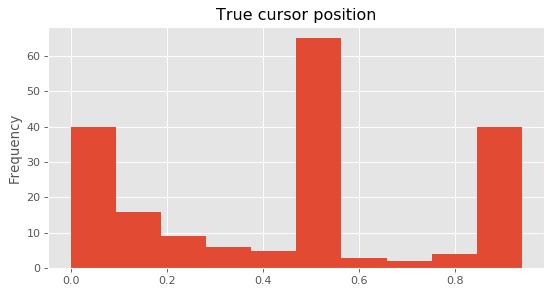

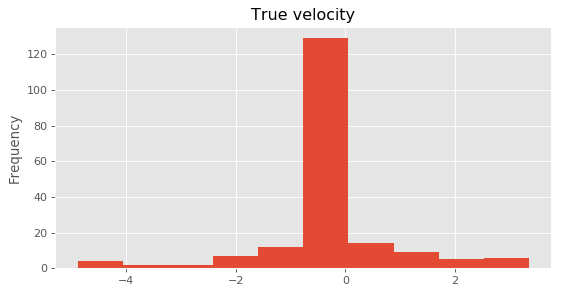

In [407]:
captured.true_x.plot.hist(title="True cursor position")
plt.figure()
captured.true_dx.plot.hist(title="True velocity")

## Sanity checks

One of the major advantages of a Bayesian generative model is that we can check if the properties we would expect to see hold in simulation. After all, we are writing down a simulator that can generate supposedly plausible behaviour.

### Prior predictive checks


In [418]:
samples = prior(50)

Text(0.5, 1.0, 'Prior draws position')

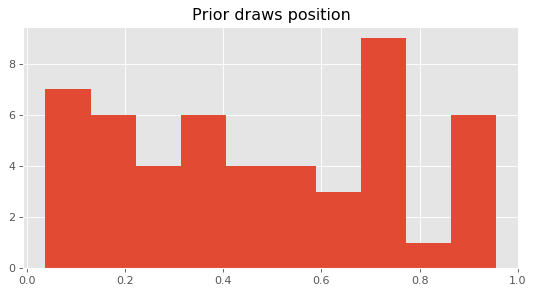

In [419]:
plt.hist(samples[:,0])
plt.title("Prior draws position")

Text(0.5, 1.0, 'Prior draws velocity')

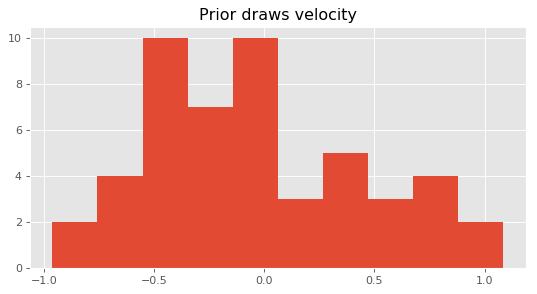

In [420]:
plt.hist(samples[:,1])
plt.title("Prior draws velocity")

Text(0.5, 1.0, 'Prior draws')

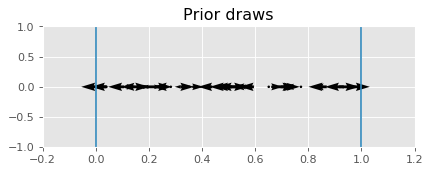

In [421]:
# show 20 random samples from the prior
# should be randomly spread in the range [0,1], with some small initial velocity

fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(1, 1, 1)
ax.quiver(samples[:, 0],
          0 * samples[:, 0],
          samples[:, 1],
          0 * samples[:, 0],
          units='x',
          scale=10)
ax.axvline(0.0, color='C1')
ax.axvline(1.0, color='C1')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, 1)
ax.set_title("Prior draws")

### Draws from the random process
We can sample the evolution of samples over time, to see whether the simple dynamics can capture the kinds of variation we might expect to see. Note that we will see much more variation in these processes than we would observe when conditioning on data; this is why the plots are so "wiggly".


Text(0.5, 1.0, 'Evolution over time')

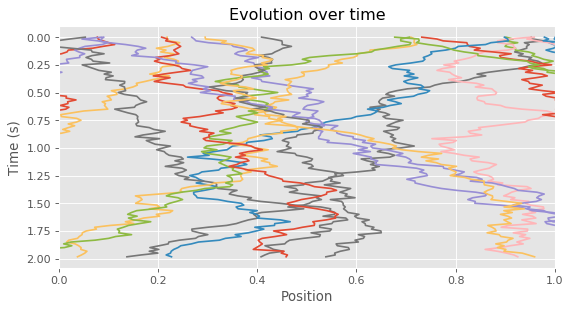

In [422]:
# sampled evolutions, showing the dynamics without
# any sampling process, unconditioned draws from
# the random process
samples = prior(20)

# show 20 random trajectories
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

trajectories = []
for i in range(120):
    samples = dynamics(samples, 1 / 60.0)
    trajectories.append(samples)

trajectories = np.array(trajectories)

for i in range(len(samples)):
    ax.plot(trajectories[:, i, 0],
            (1 / 60.0) * np.arange(0, len(trajectories[:, i, 0])))

# Set the axis properties
ax.set_xlim(0.0, 1.0)
ax.invert_yaxis()
ax.set_xlabel("Position")
ax.set_ylabel("Time (s)")
ax.set_title("Evolution over time")

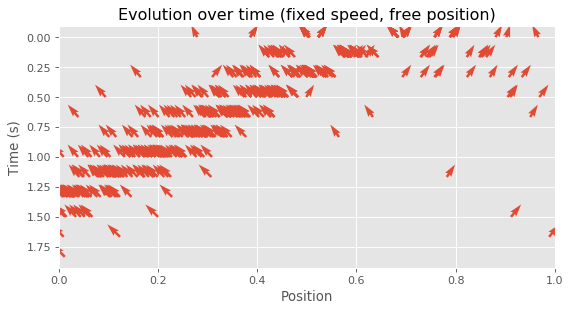

In [38]:
samples = prior(50)

# show 20 random trajectories
# but this time, we observe a speed of 0.5

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(12):
    # observe just the speed (we mask out the position using NaN)
    observed = ma.masked_invalid([np.nan, 0.5])

    # compute the new states and their weights
    samples, weights = filter_step(samples,
                                   observed=observed,
                                   dt=1 / 6.0,
                                   prior_rate=0.05)

    ax.quiver(samples[:, 0], (1 / 6.0) * i + 0 * samples[:, 0],
              samples[:, 1],
              0 * samples[:, 0] + 0.5,
              scale=20,
              color='C0',
              width=0.005)

ax.set_xlim(0.0, 1.0)
ax.set_xlabel("Position")
ax.set_ylabel("Time (s)")
ax.set_title("Evolution over time (fixed speed, free position)")
ax.invert_yaxis()

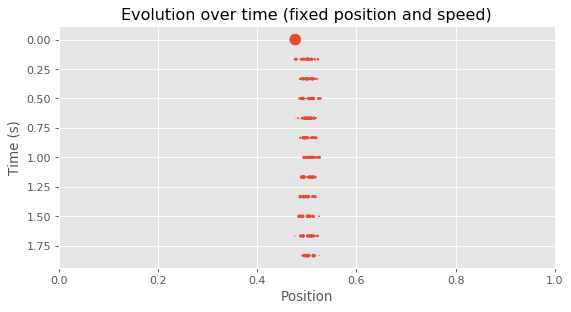

In [39]:
samples = prior(50)

# show 50 random trajectories
# but this time, we observe a static cursor at x=0.5

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(12):
    # observe just the speed
    observed = ma.masked_invalid([0.5, 0.0])
    samples, weights = filter_step(samples,
                                   observed=observed,
                                   dt=1 / 6.0,
                                   prior_rate=0.05)

    ax.scatter(x=samples[:, 0],
               y=(1 / 6.0) * i + 0 * samples[:, 0],
               c='C0',
               s=weights * 100)

ax.set_xlim(0.0, 1.0)
ax.set_xlabel("Position")
ax.set_ylabel("Time (s)")
ax.set_title("Evolution over time (fixed position and speed)")
ax.invert_yaxis()

## Demo

`python intermittent_slider.py --particles`

## What have we done?

This is a very simple model for a very simple problem. But it lets us deal with a lot of messiness in a principled manner. It has several attributes that would be difficult to approach in a coherent way with other techniques.

* **Dealt with intermittency**: decoupled from real-time state, because our model has internal dynamics
* **Represented uncertainty**: we know when control is good and when it is bad
* **Decoded discrete outputs**: we have inferred continuous states, then mapped to a 1 of N choice
* **Fused multiple sensors**: we combined the occasional, precise position measurement with continuous, ambiguous and noisy speed measurement
* **Inferred hidden states**: we never observed or computed velocity, but we were able to update our distribution over possible values regardless.